### Import Libraries
### Load Dataset

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv("dataset//social_media.csv")

## Data Preprocessing

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 9 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Timestamp                                                      589 non-null    object 
 1   Age                                                            1019 non-null   int64  
 2    Gender                                                        1012 non-null   object 
 3    Major (Computer Science, Business, Engineering, etc.)         1001 non-null   object 
 4    Hours Spent on Social Media per Day (Average)                 1019 non-null   float64
 5    Primary Social Media Platform.                                1019 non-null   object 
 6    Frequency of Posting in social media                          1018 non-null   object 
 7   Number of Friends  or Followers in social media              

In [118]:
df = df.drop('Timestamp', axis=1)
df = df.set_axis(['Age', 'Gender', 'Major', 'Time_spent(hr)', 'Primary_media','Posting_Frequency','No_of_friends','Academic_Performance'], axis=1)

In [119]:
df.head(10)

,Age,Gender,Major,Time_spent(hr),Primary_media,Posting_Frequency,No_of_friends,Academic_Performance
0,25,Male,Computer Science,3.0,Instagram,Rarely,8,Poor
1,25,Male,Computer Science,3.0,Facebook,Rarely,30,Average
2,24,Female,Computer Science,3.0,Facebook,Sometimes,600,Average
3,25,Male,Computer Science,1.0,Facebook,Rarely,500,Poor
4,24,Male,Computer Science,3.0,Facebook,Rarely,20,Average
5,25,Male,Computer Science,3.0,Facebook,Sometimes,2500,Good
6,25,Male,IT,4.0,Facebook,Rarely,955,Average
7,25,Male,Computer Science,2.0,Facebook,Rarely,1100,Average
8,23,Male,CSE,1.5,Facebook,Rarely,300,Average
9,25,Male,Computer Science & Engineering,2.0,Facebook,Rarely,560,Average


In [120]:
df = df.dropna()
df.drop_duplicates(inplace=True)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 0 to 1018
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   974 non-null    int64  
 1   Gender                974 non-null    object 
 2   Major                 974 non-null    object 
 3   Time_spent(hr)        974 non-null    float64
 4   Primary_media         974 non-null    object 
 5   Posting_Frequency     974 non-null    object 
 6   No_of_friends         974 non-null    object 
 7   Academic_Performance  974 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 68.5+ KB


In [122]:
columns_to_check = [ 'Gender', 'Major', 'Primary_media','Posting_Frequency','Academic_Performance']
for col in columns_to_check:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'Gender': ['Male' 'Female' '1']
Unique values in column 'Major': ['Computer Science' 'IT' 'CSE' 'Computer Science & Engineering' 'EEE'
 'Computer Science ' 'Business' 'Biology' 'Mechanical' 'Psychology'
 'Textile Engineering' 'Physics' 'Textile' 'Finance' 'Management' 'MBBS'
 'Physics ' 'Social Work ' 'Nuclear Engineering ' 'Chemistry '
 'Bio-chemistry' 'Engineering ' 'Information Technology ' 'Agriculture '
 'Bss' 'BBA' 'Arts' 'Dyes and Chemical Engineering ' 'Education ' 'BA'
 'CE' 'Other' 'Ag' 'BSAg' 'Bsag' 'Agricultural ' 'Agriculture' 'BSAg '
 'Engineering']
Unique values in column 'Primary_media': ['Instagram' 'Facebook' 'Twitter' 'LinkedIn' 'Snapchat' 'TikTok'
 'WhatsApp ' 'Youtube' 'X/Twitter' 'Whatsapp' 'Reddit' 'YouTube']
Unique values in column 'Posting_Frequency': ['Rarely' 'Sometimes' 'Never' 'Often' 'Daily' 'Always']
Unique values in column 'Academic_Performance': ['Poor' 'Average' 'Good']


In [123]:
(df['Gender']=='1').sum()

np.int64(5)

In [124]:
df.loc[df['Gender'] == '1', 'Gender'] = 'Female'
print((df['Gender']=='1').sum())

0


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 0 to 1018
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   974 non-null    int64  
 1   Gender                974 non-null    object 
 2   Major                 974 non-null    object 
 3   Time_spent(hr)        974 non-null    float64
 4   Primary_media         974 non-null    object 
 5   Posting_Frequency     974 non-null    object 
 6   No_of_friends         974 non-null    object 
 7   Academic_Performance  974 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 68.5+ KB


In [126]:
import re

def normalize_subject(value):
    if pd.isna(value):
        return value
    value = value.strip().lower()
    
    # Regex-based normalization
    if re.search(r'computer science|cse|it|information technology', value):
        return 'Computer Science & IT'
    if re.search(r'eee|electrical', value):
        return 'Electrical Engineering'
    if re.search(r'mechanical', value):
        return 'Mechanical Engineering'
    if re.search(r'textile engineering', value):
        return 'Textile Engineering'
    if re.search(r'textile', value):
        return 'Textile'
    if re.search(r'physics', value):
        return 'Physics'
    if re.search(r'chemistry|bio-chemistry', value):
        return 'Chemistry'
    if re.search(r'nuclear engineering', value):
        return 'Nuclear Engineering'
    if re.search(r'business|finance|management|bba', value):
        return 'Business & Management'
    if re.search(r'biology', value):
        return 'Biological Sciences'
    if re.search(r'agriculture|bsag|agricultural|ag', value):
        return 'Agriculture'
    if re.search(r'social work', value):
        return 'Social Sciences'
    if re.search(r'arts|ba|bss', value):
        return 'Arts & Humanities'
    if re.search(r'education', value):
        return 'Education'
    if re.search(r'mbbs|medical', value):
        return 'Medical Sciences'
    if re.search(r'engineering|dyes and chemical engineering', value):
        return 'General Engineering'
    if re.search(r'other', value):
        return 'Other'
    return 'Other'

def preprocess_primary_media(value):
    if pd.isna(value):
        return value
    value = value.strip().lower()
    
    # Normalize platform names using regex
    if re.search(r'instagram', value):
        return 'Instagram'
    if re.search(r'facebook', value):
        return 'Facebook'
    if re.search(r'twitter|x/twitter', value):
        return 'X'
    if re.search(r'linkedin', value):
        return 'LinkedIn'
    if re.search(r'snapchat', value):
        return 'Snapchat'
    if re.search(r'tiktok', value):
        return 'TikTok'
    if re.search(r'whatsapp', value):
        return 'WhatsApp'
    if re.search(r'youtube', value):
        return 'YouTube'
    if re.search(r'reddit', value):
        return 'Reddit'
    return 'Other'


df['Primary_media'] = df['Primary_media'].map(preprocess_primary_media)
df['Major'] = df['Major'].map(normalize_subject)

In [127]:
columns_to_check = [ 'Gender', 'Major', 'Primary_media','Posting_Frequency','Academic_Performance']
for col in columns_to_check:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'Gender': ['Male' 'Female']
Unique values in column 'Major': ['Computer Science & IT' 'Electrical Engineering' 'Business & Management'
 'Biological Sciences' 'Mechanical Engineering' 'Other'
 'Textile Engineering' 'Physics' 'Textile' 'Medical Sciences'
 'Social Sciences' 'Nuclear Engineering' 'Chemistry' 'General Engineering'
 'Agriculture' 'Arts & Humanities' 'Education']
Unique values in column 'Primary_media': ['Instagram' 'Facebook' 'X' 'LinkedIn' 'Snapchat' 'TikTok' 'WhatsApp'
 'YouTube' 'Reddit']
Unique values in column 'Posting_Frequency': ['Rarely' 'Sometimes' 'Never' 'Often' 'Daily' 'Always']
Unique values in column 'Academic_Performance': ['Poor' 'Average' 'Good']


## EDA

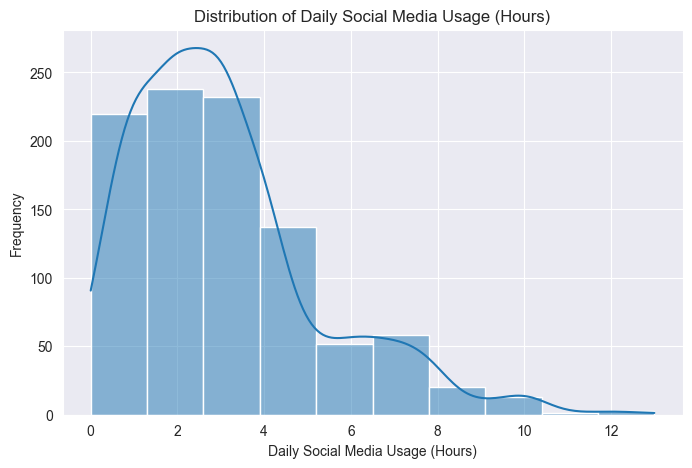

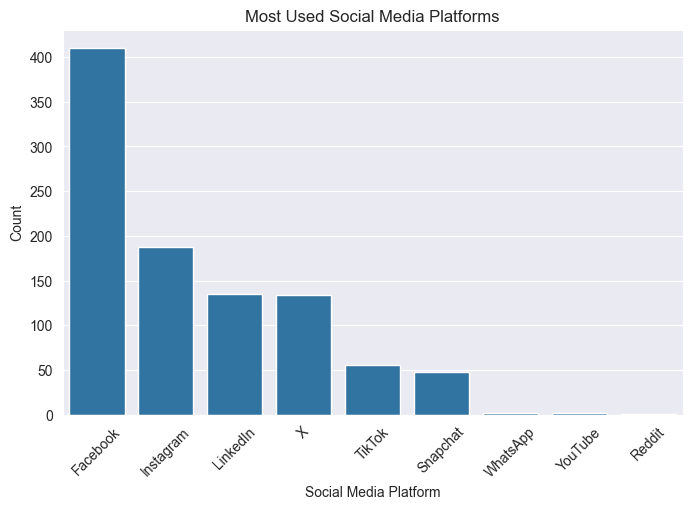

In [128]:
# Social Media Usage Analysis
# Distribution of daily social media usage (hours)
plt.figure(figsize=(8, 5))
sns.histplot(df['Time_spent(hr)'], bins=10, kde=True)
plt.title("Distribution of Daily Social Media Usage (Hours)")
plt.xlabel("Daily Social Media Usage (Hours)")
plt.ylabel("Frequency")
plt.show()

# Most common social media platforms
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Primary_media', order=df['Primary_media'].value_counts().index)
plt.title("Most Used Social Media Platforms")
plt.xlabel("Social Media Platform")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



### Social Media Usage Distribution
The dataset shows that the daily use of social media is significant, with most people spending around 2.5 to 3 hours or more on average.

Among the platforms, Facebook emerges as the most used, followed by Instagram, with other platforms like X, LinkedIn, and TikTok having comparatively less usage.

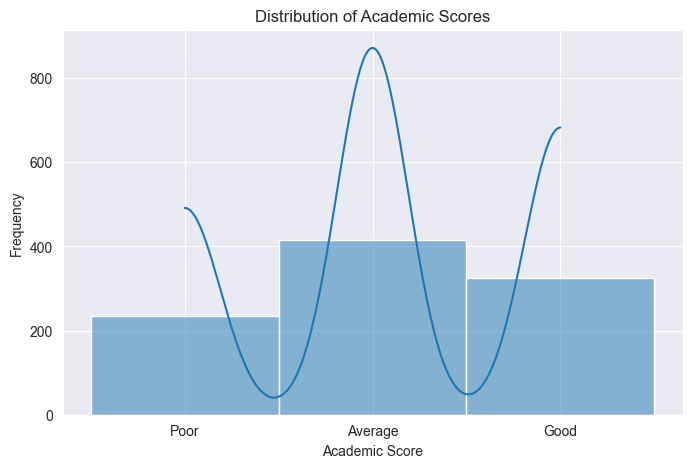

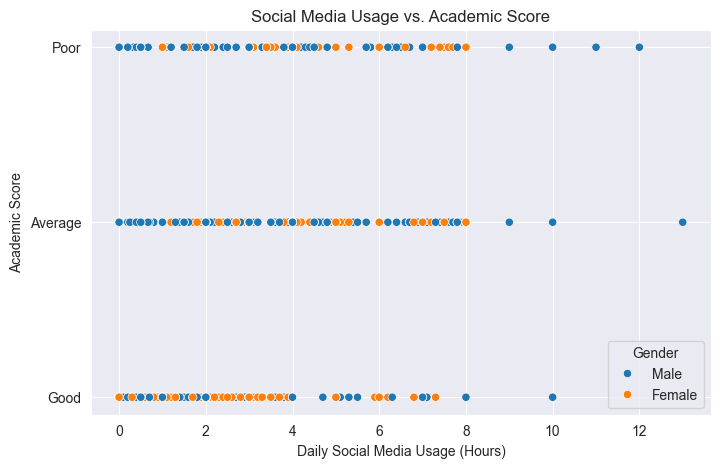


Correlation between Social Media Usage and Academic Score: -0.25


,Age,Gender,Major,Time_spent(hr),Primary_media,Posting_Frequency,No_of_friends,Academic_Performance,Academic_Level
0,25,Male,Computer Science & IT,3.0,Instagram,Rarely,8,Poor,0
1,25,Male,Computer Science & IT,3.0,Facebook,Rarely,30,Average,1
2,24,Female,Computer Science & IT,3.0,Facebook,Sometimes,600,Average,1
3,25,Male,Computer Science & IT,1.0,Facebook,Rarely,500,Poor,0
4,24,Male,Computer Science & IT,3.0,Facebook,Rarely,20,Average,1


In [129]:
# Academic Performance Analysis
# Distribution of academic scores
plt.figure(figsize=(8, 5))
sns.histplot(df['Academic_Performance'], bins=10, kde=True)
plt.title("Distribution of Academic Scores")
plt.xlabel("Academic Score")
plt.ylabel("Frequency")
plt.show()

# Scatter plot: Social media usage vs. academic score
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Time_spent(hr)', y='Academic_Performance', hue='Gender')
plt.title("Social Media Usage vs. Academic Score")
plt.xlabel("Daily Social Media Usage (Hours)")
plt.ylabel("Academic Score")
plt.show()

# Mapping Academic Performance into numerical value
Academic_mapping = {'Good': 2, 'Average': 1, 'Poor': 0}
df['Academic_Level'] = df['Academic_Performance'].map(Academic_mapping)
df.head()

# Correlation between social media usage and academic score
correlation = df['Time_spent(hr)'].corr(df['Academic_Level'])
print(f"\nCorrelation between Social Media Usage and Academic Score: {correlation:.2f}")

df.head(5)

### Academic Performance
The distribution of academic scores suggests that most of the people have an average academic score. About 45 people have good academic score and more than 40 having an average academic score.
most of the people also have got a good academic score and very few have a poor academic score.
The distribution of daily social media usage shows that most individuals spend around 2.5 to 3 hours on social media. Facebook is the most widely used social media platform, followed by Instagram.

we can't find any strong correlation between time spend on social media and academic performance.
The analysis of academic performance indicates that a majority of people have average academic scores, with fewer having good scores. There is no strong correlation observed between time spent on social media and academic performance.

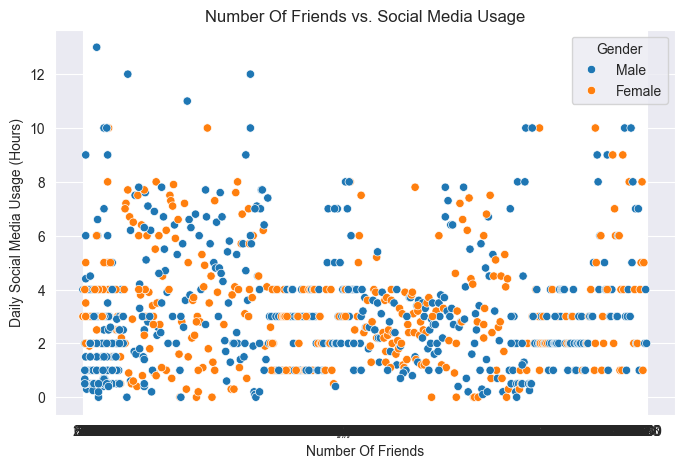

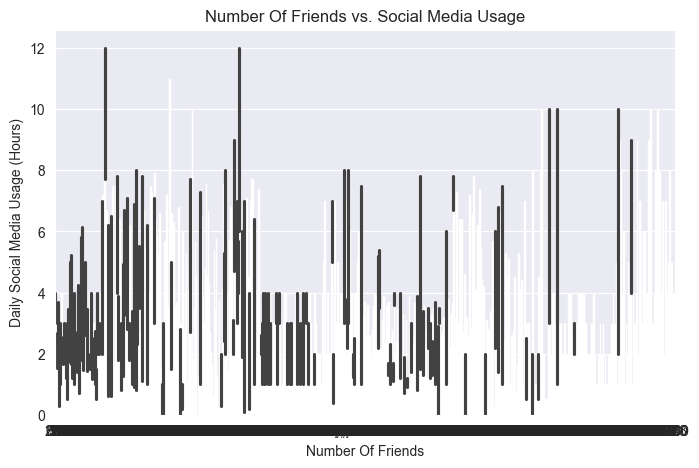

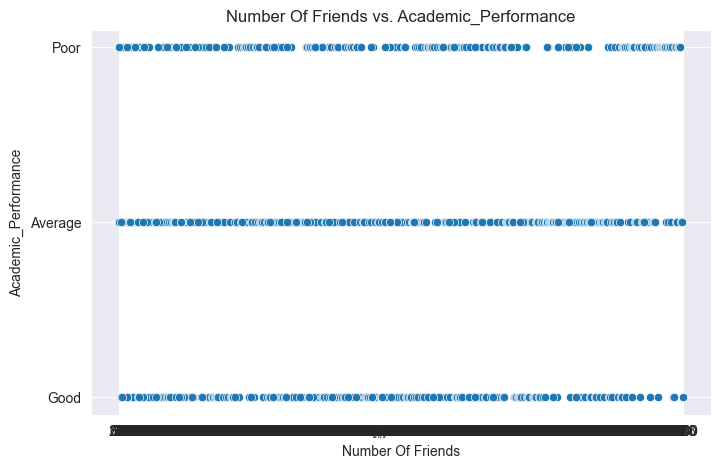

In [130]:
# Categorize Number of Friends vs Time spent on Social media and also  Academic_Performance 
# Plot number of Friends vs Time spent on social media
# Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='No_of_friends', y='Time_spent(hr)', hue='Gender')
plt.title("Number Of Friends vs. Social Media Usage")
plt.xlabel("Number Of Friends")
plt.ylabel("Daily Social Media Usage (Hours)")
plt.show()

# Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='No_of_friends', y='Time_spent(hr)')
plt.title("Number Of Friends vs. Social Media Usage")
plt.xlabel("Number Of Friends")
plt.ylabel("Daily Social Media Usage (Hours)")
plt.show()

# Compare No Of Friends Vs Academic_Performance
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='No_of_friends', y='Academic_Performance')
plt.title("Number Of Friends vs. Academic_Performance")
plt.xlabel("Number Of Friends")
plt.ylabel("Academic_Performance")
plt.show()



### Number of Friends vs Time Spent on Social Media

The scatter plot shows no clear correlation between the number of friends and time spent on social media. Individuals with fewer friends tend to spend more time, while those with thousands of friends spend less.

The bar plot supports this observation, and the third plot reveals no strong relationship between the number of friends and academic performance. Both high and low friend counts are associated with a range of academic outcomes.

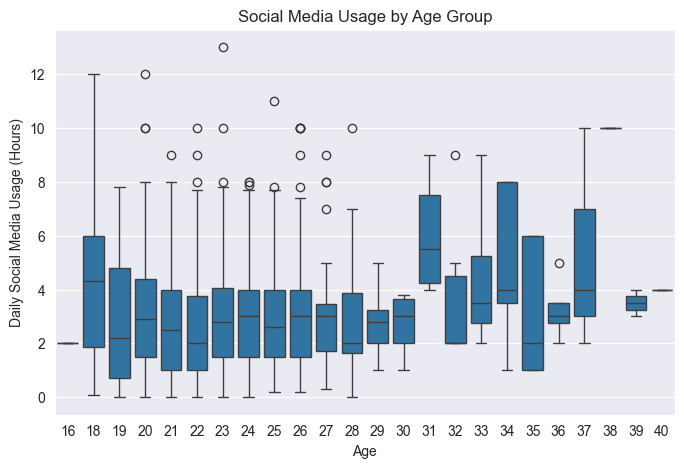

C:\Users\user\AppData\Local\Temp\ipykernel_3092\636166118.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Gender', y='Time_spent(hr)', palette='muted')


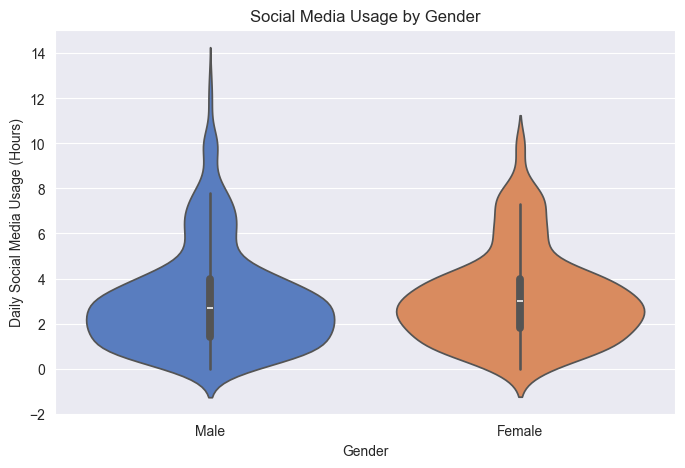

In [131]:
# Impact of Age
# Social media usage by age group
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Age', y='Time_spent(hr)')
plt.title("Social Media Usage by Age Group")
plt.xlabel("Age")
plt.ylabel("Daily Social Media Usage (Hours)")
plt.show()

# Gender-based analysis of social media usage
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Gender', y='Time_spent(hr)', palette='muted')
plt.title("Social Media Usage by Gender")
plt.xlabel("Gender")
plt.ylabel("Daily Social Media Usage (Hours)")
plt.show()



### Impact of age 
We can hardly find any noticable difference people in different age group have any impact on social media usage. The usage of social media quite random and is not dependent on age in this case.

The second plot describes the daily social media usage of male and female . we can see that both the female and male use social media for mostly 3 hours daily. though there are some male who uses social media for less amount of time and also some male use more  than 3 hours.

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 0 to 1018
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   974 non-null    int64  
 1   Gender                974 non-null    object 
 2   Major                 974 non-null    object 
 3   Time_spent(hr)        974 non-null    float64
 4   Primary_media         974 non-null    object 
 5   Posting_Frequency     974 non-null    object 
 6   No_of_friends         974 non-null    object 
 7   Academic_Performance  974 non-null    object 
 8   Academic_Level        974 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 108.4+ KB


In [133]:
# Function to clean the column
def clean_no_of_friends(value):
    if pd.isna(value):
        return value
    match = re.search(r'\d+', value)  # Updated regex to find digits anywhere in the string
    return int(match.group()) 

# Apply the cleaning function to the column
df['No_of_friends'] = df['No_of_friends'].apply(clean_no_of_friends)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 0 to 1018
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   974 non-null    int64  
 1   Gender                974 non-null    object 
 2   Major                 974 non-null    object 
 3   Time_spent(hr)        974 non-null    float64
 4   Primary_media         974 non-null    object 
 5   Posting_Frequency     974 non-null    object 
 6   No_of_friends         974 non-null    int64  
 7   Academic_Performance  974 non-null    object 
 8   Academic_Level        974 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 108.4+ KB


In [135]:
df.to_csv("cleaned_dataset/Social_media.csv")

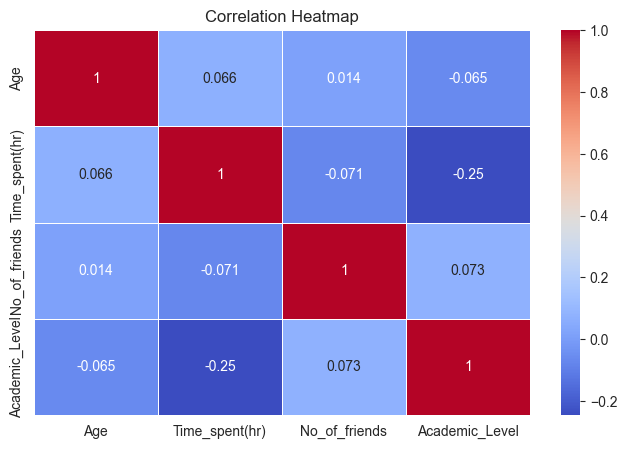

In [136]:
# 6. Relationships and Correlations
# Correlation heatmap
plt.figure(figsize=(8, 5))
corr = df[['Age', 'Time_spent(hr)', 'No_of_friends', 'Academic_Level']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



The correlation heatmap reveals the following:
1. **No_of_friends vs. Academic_Level (0.073):** There is a very low positive correlation, suggesting that individuals with more friends tend to perform slightly better academically.
2. **Time_spent(hr) vs. No_of_friends (-0.071):** A weak negative correlation is observed, indicating individuals who spend more time on social media may tend to have slightly fewer friends.
3. **Time_spent(hr) vs. Academic_Level (-0.25):** A weak negative correlation, implying no strong relationship between social media usage and academic performance. But this is one of the strongest correlation among them.
4. **Age vs. Academic_Level (-0.065):** A negligible negative correlation between age and academic performance, showing no strong dependency.
5. Most other correlations are very weak or negligible, highlighting no significant relationships among the variables.

In conclusion, the dataset shows weak or negligible correlations overall, with the mild positive relationship between the number of friends and academic level being the most notable.

In [137]:
# from sklearn import preprocessing 
  
# label_encoder = preprocessing.LabelEncoder() 
# df['Gender']= label_encoder.fit_transform(df['Gender'])

In [138]:
# df['Posting_Frequency']= label_encoder.fit_transform(df['Posting_Frequency'])
# df['Academic_Performance']= label_encoder.fit_transform(df['Academic_Performance'])

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 0 to 1018
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   974 non-null    int64  
 1   Gender                974 non-null    object 
 2   Major                 974 non-null    object 
 3   Time_spent(hr)        974 non-null    float64
 4   Primary_media         974 non-null    object 
 5   Posting_Frequency     974 non-null    object 
 6   No_of_friends         974 non-null    int64  
 7   Academic_Performance  974 non-null    object 
 8   Academic_Level        974 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 108.4+ KB


In [140]:
df = pd.get_dummies(df,columns=['Academic_Performance','Posting_Frequency','Gender','Major','Primary_media'])

In [141]:
df.head()

,Age,Time_spent(hr),No_of_friends,Academic_Level,Academic_Performance_Average,Academic_Performance_Good,Academic_Performance_Poor,Posting_Frequency_Always,Posting_Frequency_Daily,Posting_Frequency_Never,...,Major_Textile Engineering,Primary_media_Facebook,Primary_media_Instagram,Primary_media_LinkedIn,Primary_media_Reddit,Primary_media_Snapchat,Primary_media_TikTok,Primary_media_WhatsApp,Primary_media_X,Primary_media_YouTube
0,25,3.0,8,0,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,25,3.0,30,1,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,24,3.0,600,1,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,25,1.0,500,0,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,24,3.0,20,1,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


### Overall Insights and Conclusion

- **Overall Trends in Social Media Usage**:
  - Daily social media usage averages around 3 hours, with some variation across genders and age groups.
  - Facebook and Instagram are the most utilized platforms, highlighting user preferences for these platforms.

- **Weak Correlations and Relationships**:
  - No strong linear relationships were identified among key numerical variables like `Time_spent(hr)`, `No_of_friends`, and `Academic_Performance`.
  - A mild positive correlation exists between the number of friends and academic performance but is not significant.

- **Analysis by Attributes**:
  - **Gender**: Both males and females exhibit similar average daily usage of social media (~3 hours), with minor outliers.
  - **Age**: Social media usage by age is random, with no discernible pattern observed across age groups.
  - **Platform Preferences**: Among various media platforms, Facebook ranks highest, followed by Instagram, while others like TikTok, LinkedIn, and Reddit have smaller user bases.

- **Potential Outliers**:
  - The `No_of_friends` column shows some extreme values, which could be outliers potentially affecting the analysis. These should be reviewed further for data quality.

- **Dataset Limitations**:
  - There is a lack of diversity in attributes such as `Academic_Performance` and `Primary_media`, which limits the scope for observing strong or insightful patterns.
  - The dataset is relatively homogeneous, lacking significant variation in key features, making it challenging to identify meaningful trends.

### Conclusion:
While this dataset provides a snapshot of social media usage and its relationship with variables like academic performance, the lack of strong correlations and diversity in the dataset restricts actionable insights. Further studies could benefit from larger, more diverse datasets with more comprehensive attributes to uncover hidden patterns or relationships.

## Model Training

In [142]:
# from sklearn.preprocessing import OneHotEncoder 

# # Encode categorical variables using One-Hot Encoding
# categorical_columns = ['Primary_media', 'Major']
# encoder = OneHotEncoder(sparse_output=False)
# encoded_features = encoder.fit_transform(df[categorical_columns])
# encoded_feature_names = encoder.get_feature_names_out(categorical_columns)

# # Combine encoded features with the original df
# encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)
# df = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

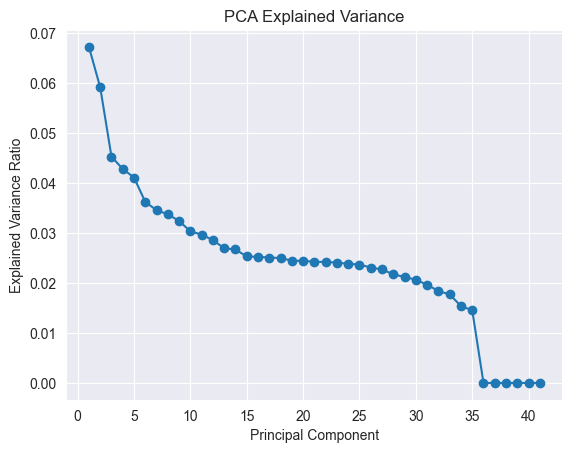

In [143]:
# Applying the PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Fitting the PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.show()




In [144]:
# Select top components (e.g., 2 components)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline

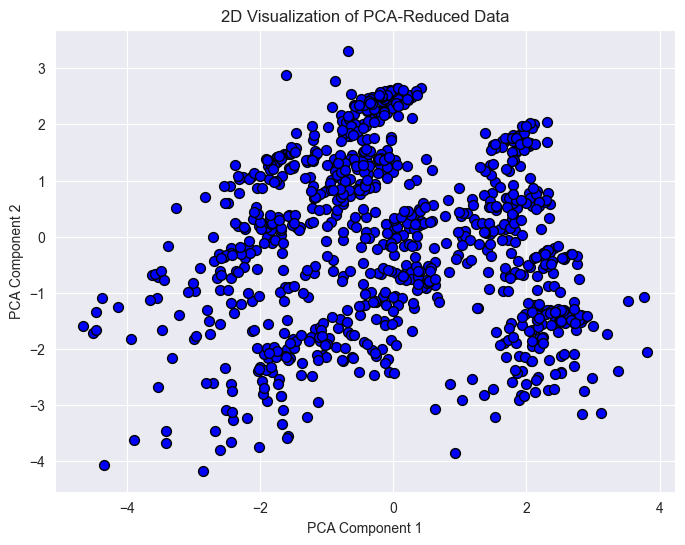

In [146]:
# Assuming `reduced_data` is the PCA-reduced data (2D)
plt.figure(figsize=(8, 6))

# Scatter plot of the reduced data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', edgecolor='k', s=50)

# Add plot annotations
plt.title("2D Visualization of PCA-Reduced Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Display the plot
plt.show()

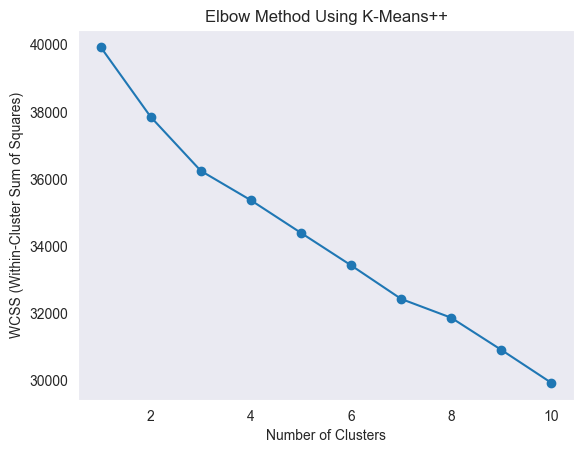

In [147]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize an empty list to store WCSS (Within-Cluster Sum of Squares)
wcss = []

# Loop through the number of clusters from 1 to 10
for k in range(1, 11):
    kmeans_plus_plus = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_plus_plus.fit(scaled_data)
    wcss.append(kmeans_plus_plus.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method Using K-Means++")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid()
plt.show()


In [148]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming X is your dataset
X = scaled_data

# Range of k values to test
k_values = range(2, 11)  # You can adjust the range based on your data

sil_scores = []

# Iterate over each k value
for k in k_values:
    # Fit KMeans model with K-Means++ initialization
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    # Compute the silhouette score for the current k
    score = silhouette_score(X, kmeans.labels_)
    sil_scores.append(score)

# Print silhouette scores for each k
for k, score in zip(k_values, sil_scores):
    print(f"Silhouette score for k={k}: {score}")


Silhouette score for k=2: 0.0870224652566957
Silhouette score for k=3: 0.08510500052688039
Silhouette score for k=4: 0.07150430997355783
Silhouette score for k=5: 0.07378533230762332
Silhouette score for k=6: 0.07845048683450737
Silhouette score for k=7: 0.08392833891401028
Silhouette score for k=8: 0.07683011305367908
Silhouette score for k=9: 0.08744750826069576
Silhouette score for k=10: 0.090422006115441


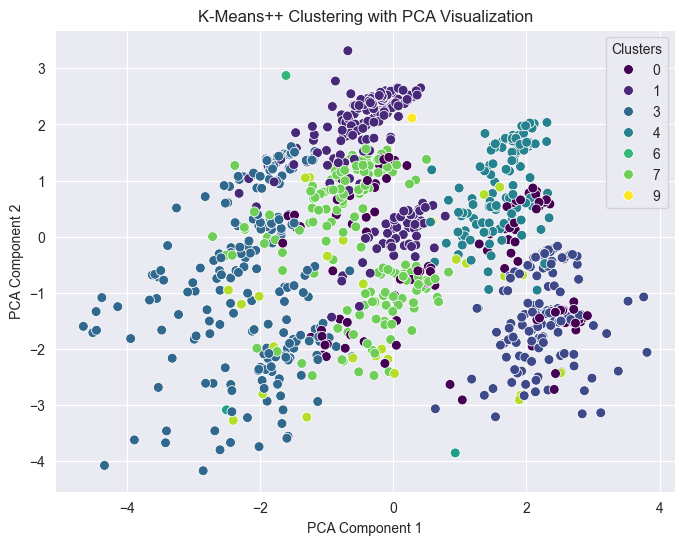

In [149]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Perform KMeans clustering with K-Means++ initialization
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Perform PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Plot the clusters with PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=kmeans_labels, palette='viridis', s=50)
plt.title('K-Means++ Clustering with PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Clusters', loc='best')
plt.grid(True)
plt.show()

In [150]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

print("Evaluation of K-Means Cluster")
print(f"Silhouette Score: {silhouette_score(scaled_data, kmeans_labels):.2f}")
print(f"DB_Score: {davies_bouldin_score(scaled_data, kmeans_labels):.2f}")

Evaluation of K-Means Cluster
Silhouette Score: 0.09
DB_Score: 2.08


In [151]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=6, min_samples=8).fit(scaled_data)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 44


C:\Users\user\AppData\Local\Temp\ipykernel_3092\3088325173.py:17: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


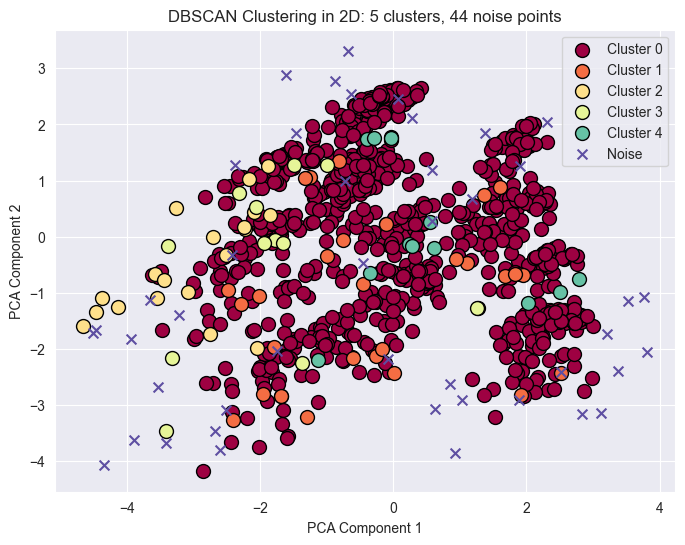

In [152]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming labels are from DBSCAN
# pca_result is the 2D compressed data from PCA

# Plot DBSCAN results
plt.figure(figsize=(8, 6))

# Unique labels including noise (-1)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points (label = -1)
        plt.scatter(
            pca_result[labels == label, 0],
            pca_result[labels == label, 1],
            c=[color],
            marker="x",
            label="Noise",
            s=50,
            edgecolor="k",
        )
    else:
        # Cluster points
        plt.scatter(
            pca_result[labels == label, 0],
            pca_result[labels == label, 1],
            c=[color],
            label=f"Cluster {label}",
            s=100,
            edgecolor="k",
        )

# Plot settings
plt.title(f"DBSCAN Clustering in 2D: {n_clusters_} clusters, {n_noise_} noise points")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(loc="best")
plt.show()

In [153]:
print("Evaluation of DBSCAN Cluster")
print(f"Silhouette Score: {silhouette_score(scaled_data,labels):.2f}")
print(f"DB_Score: {davies_bouldin_score(scaled_data,labels):.2f}")

Evaluation of DBSCAN Cluster
Silhouette Score: 0.24
DB_Score: 3.25


## Overview
**K-Means++**
From the K-Means clustering results projected onto the PCA-reduced data, we observe the following:

 - Multiple distinct clusters are visible, represented by unique colors, suggesting meaningful separations within the dataset.

 - The clusters are reasonably compact and distributed across the PCA space, indicating effective grouping of data points with similar attributes.

 - Although the separation is evident, the Silhouette Score (0.09) points to potentially weak or overlapping clusters based on the current features.


**DBSCAN**
The DBSCAN clustering result, visualized in 2D using PCA components, shows:

 - A total of 5 clusters were identified, with 44 points marked as noise.

 - DBSCAN effectively separates densely packed regions in the dataset, accommodating clusters of varying shapes and sizes.

 - Although it discovers meaningful groupings, the Silhouette Score (0.24) and Davies-Bouldin Score (3.25) hint at moderate performance with potential room for improvement in parameter tuning.

### Summary
 - K-Means demonstrated adequate clustering, but the low Silhouette Score suggests overlap in clusters.
 - DBSCAN efficiently identified clusters and noise points, making it robust to outliers. However, fine-tuning parameters is critical for enhancing its effectiveness in this dataset.
